# Classificação de Vinhos com KNN
Este notebook utiliza o algoritmo KNN (K-Nearest Neighbors) para classificar vinhos com base em características químicas.  
O objetivo é avaliar o impacto de diferentes valores de `k` (número de vizinhos) e `random_state` na acurácia do modelo.

### Tarefas:
1. Carregar os dados do UCI Wine Dataset.
2. Dividir os dados em treino (70%) e teste (30%).
3. Treinar e avaliar classificadores KNN com diferentes valores de `k` e `random_state`.
4. Comparar os resultados e identificar a melhor configuração.


In [3]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [4]:
# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Separação de variáveis
X = vinhos.drop('classe', axis=1)  # Variáveis preditoras
y = vinhos['classe']              # Variável alvo


In [5]:
# Função para realizar treino e teste
def train_evaluate_knn(X, y, k_values, random_states):
    resultados = []

    for random_state in random_states:
        # Divisão dos dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

        for k in k_values:
            # Treinamento do modelo
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)

            # Previsão
            y_pred = knn.predict(X_test)

            # Cálculo da acurácia
            acuracia = accuracy_score(y_test, y_pred)
            resultados.append({'random_state': random_state, 'k': k, 'accuracy': acuracia})

            # Exibição de resultados
            print(f"Random State: {random_state}, k: {k}, Acurácia: {acuracia:.4f}")

    return pd.DataFrame(resultados)



In [6]:
# Valores de k e random_state a serem analisados
k_values = [3, 5]
random_states = [42, 17, 24]

# Treinamento e avaliação
resultados = train_evaluate_knn(X, y, k_values, random_states)

Random State: 42, k: 3, Acurácia: 0.7407
Random State: 42, k: 5, Acurácia: 0.7407
Random State: 17, k: 3, Acurácia: 0.6481
Random State: 17, k: 5, Acurácia: 0.6667
Random State: 24, k: 3, Acurácia: 0.7407
Random State: 24, k: 5, Acurácia: 0.6667


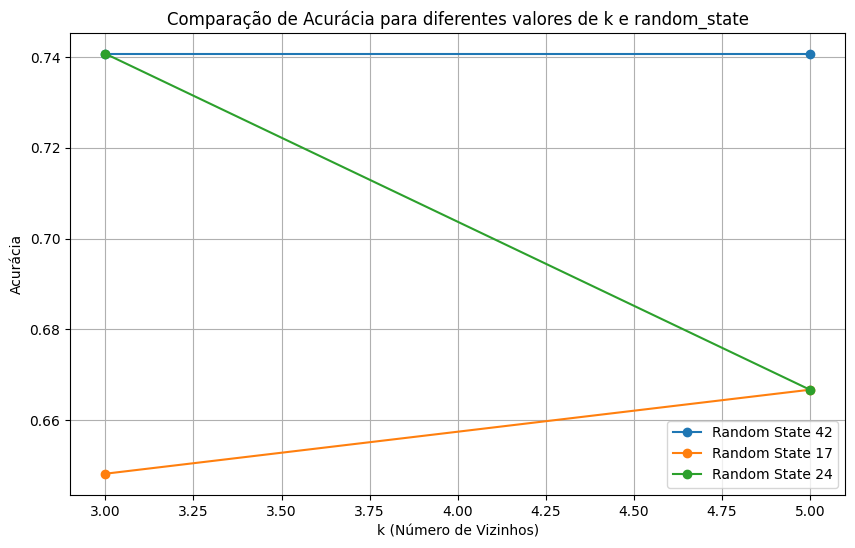

In [7]:
# Análise final: comparação gráfica
plt.figure(figsize=(10, 6))
for random_state in random_states:
    subset = resultados[resultados['random_state'] == random_state]
    plt.plot(subset['k'], subset['accuracy'], label=f"Random State {random_state}", marker='o')

plt.title('Comparação de Acurácia para diferentes valores de k e random_state')
plt.xlabel('k (Número de Vizinhos)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()

In [8]:
# Melhor configuração
melhor_config = resultados.loc[resultados['accuracy'].idxmax()]
print("\nMelhor Configuração:")
print(f"Random State: {melhor_config['random_state']}, k: {melhor_config['k']}, Acurácia: {melhor_config['accuracy']:.4f}")



Melhor Configuração:
Random State: 42.0, k: 3.0, Acurácia: 0.7407
